## <center> Lecture 11 </center>
## <center> Pandas Dataframes and Data Visualization </center>

## Installation

* Ensure Pandas, Matplotlib, and Seaborn are _installed_ with the following command:


In [ ]:
!pip install pandas matplotlib seaborn

## Importing the Pandas library
* This step is required to use the Pandas library and its functions.

In [1]:
import pandas as pd

## Loading Biomedical Data

* We will start by loading an arrhythmia dataset from over 450 patients.
* The data is in CSV format, and we will use Pandas to load it.

In [2]:
csv_filename = 'data_arrhythmia.csv'
df = pd.read_csv(csv_filename, delimiter=';')

## Exploring the Data
* Verify the type of the data structure.

In [3]:
type(df)

pandas.core.frame.DataFrame

* Obtain the size of the dataframe (number of rows and columns).

In [4]:
df.shape

(452, 280)

## Accessing Data
* Access the first few rows of the dataframe.

In [5]:
df.head(5)

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


* Access a single column (age).

In [6]:
age = df['age']
age

0      75
1      56
2      54
3      55
4      75
       ..
447    53
448    37
449    36
450    32
451    78
Name: age, Length: 452, dtype: int64

## A column of a dataframe is called a _Series_
* Verify the type of the age column.

In [7]:
type(age)

pandas.core.series.Series

## Performing operations on a Series
* We will calculate the mean age of the patients.

In [8]:
mean_age = df['age'].mean()
print(f"Mean age: {mean_age:.2f}")

Mean age: 46.47


## Creating new columns in a dataframe
* We will create a new column called _age_group_ based on the age of the patients.

In [9]:
df['age_group'] = df['age'].apply(lambda x: 'Adult' if x >= 18 else 'Child')

* Verify the new column has been added to the dataframe.

In [10]:
df.head(5)

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis,age_group
0,75,0,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8,Adult
1,56,1,165,64,81,174,401,149,39,25,...,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6,Adult
2,54,0,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10,Adult
3,55,0,175,94,100,202,380,179,143,28,...,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1,Adult
4,75,0,190,80,88,181,360,177,103,-16,...,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7,Adult


## Accessing a subset of a dataframe based on a condition
* We often need to access a subset of the data based on a logical condition.
* For example, we may want to access only the records of the adult patients.

In [11]:
adults = df[df['age'] >= 18]

In [12]:
adults.head(10)

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis,age_group
0,75,0,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8,Adult
1,56,1,165,64,81,174,401,149,39,25,...,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6,Adult
2,54,0,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10,Adult
3,55,0,175,94,100,202,380,179,143,28,...,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1,Adult
4,75,0,190,80,88,181,360,177,103,-16,...,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7,Adult
6,40,1,160,52,77,129,377,133,77,77,...,6.5,0.0,0.0,0,0.4,1.0,14.3,20.5,1,Adult
7,49,1,162,54,78,0,376,157,70,67,...,8.2,-1.9,0.0,0,0.1,0.5,15.8,19.8,1,Adult
8,44,0,168,56,84,118,354,160,63,61,...,7.0,-1.3,0.0,0,0.6,2.1,12.5,30.9,1,Adult
9,50,1,167,67,89,130,383,156,73,85,...,10.8,-1.7,0.0,0,0.8,0.9,20.1,25.1,10,Adult
10,62,0,170,72,102,135,401,156,83,72,...,9.0,-2.0,0.0,0,0.8,0.9,12.3,19.3,3,Adult


* Question: what is the type of the _adults_ variable?

## Summary statistics
* We can obtain summary statistics for a column.
* For example, we can calculate the mean, standard deviation, minimum, maximum, and quartiles of the age column.

In [13]:
summary_age = df['age'].describe()
summary_age

count    452.000000
mean      46.471239
std       16.466631
min        0.000000
25%       36.000000
50%       47.000000
75%       58.000000
max       83.000000
Name: age, dtype: float64

* Q: What fraction of the patients in the dataset are less then 47 years old?

## Counting the number of occurrences of the 'Child' age group
* We often need to count the number of occurrences of a specific value in a column.

In [14]:
(df['age_group']=='Child').sum()

24

## Creating columns based on mathematical operations on existing columns
* The original dataset contains the weight in kg and the height in cm.
* We will create a new column called _bmi_ which will be equal to the weight in pounds divided by the square of height in cm.

In [15]:
df['bmi'] = df['weight'] / (df['height'] / 100)**2
df['bmi'].mean()

25.18839928094976

* Let's calculate what proportion of patients have a BMI greater than 30.

In [17]:
(df['bmi'] > 30).mean()

0.13053097345132744

* Why did I perform a mean operation on the previous cell?

## Data Visualization
* Pandas is integrated with the Matplotlib and Seaborn libraries for visualizing your data.
* Looking at your data is essential to understand it better, as well as to spot trends and outliers.
* Some of the most common plots are histograms and scatter plots.

## Importing the Matplotlib and Seaborn libraries
* These import statements are commonplace when working with data visualization in Python.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

## Simplifying the diagnosis column
* The original dataset has a diagnosis column with values ranging from 1 to 16.
* The category 1 corresponds to patients without arrhythmia.
* Categories 2 and above correspond to patients with different types of arrhythmia.
* We will simplify this column by creating a new column called _has_arrhythmia_.

In [19]:
df['has_arrhythmia'] = df['diagnosis'].apply(lambda x: 1 if x == 1 else 0)

In [20]:
df.head(5)

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,LB,LC,LD,LE,LF,LG,diagnosis,age_group,bmi,has_arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,0,0.9,2.9,23.3,49.4,8,Adult,22.160665,0
1,56,1,165,64,81,174,401,149,39,25,...,0.0,0,0.2,2.1,20.4,38.8,6,Adult,23.507805,0
2,54,0,172,95,138,163,386,185,102,96,...,0.0,0,0.3,3.4,12.3,49.0,10,Adult,32.111952,0
3,55,0,175,94,100,202,380,179,143,28,...,0.0,0,0.4,2.6,34.6,61.6,1,Adult,30.693878,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,0,-0.1,3.9,25.4,62.8,7,Adult,22.160665,0


## Calculating the proportion of patients with an arrhythmia
* We can use our newly created column to calculate the prevalence of arrhythmia in the dataset.

In [21]:
df['has_arrhythmia'].mean()

0.5420353982300885

## Creating a histogram
* A histogram is a graphical representation of the distribution of a dataset.
* We will create a histogram of the ages of the patients.

/Users/jacekdmochowski/miniconda3/envs/tfmetal/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


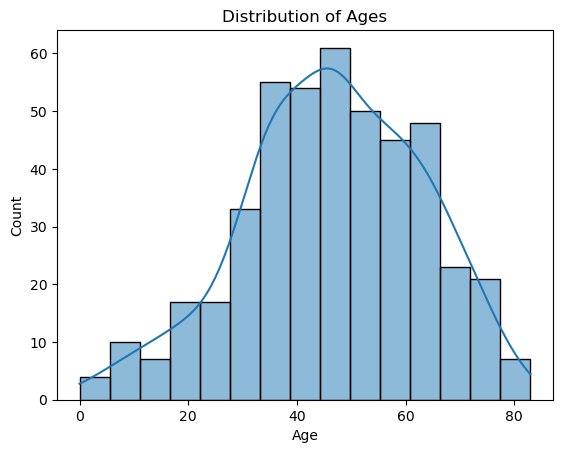

In [23]:
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Examining the relationship between variables
* We often want to examine the relationship between two or more variables.
* This can be done graphically, or numerically.
* We will demonstrate both approaches here.

## Does BMI affect the likelihood of having an arrhythmia?
* One way of addressing this is by calculating the mean BMI of patients with and without arrhythmia

In [24]:
df[df['has_arrhythmia'] == 1]['bmi'].mean()

25.436421341870002

In [ ]:
df[df['has_arrhythmia'] == 0]['bmi'].mean()

* Q: In your estimation, does BMI affect the likelihood of having an arrhythmia?

## Conditional histograms
* We can create histograms for different subsets of the data.
* For example, we can create histograms of the BMI for patients with and without arrhythmia.

In [ ]:
sns.histplot(df[df['has_arrhythmia'] == 1]['bmi'], kde=True, color='red', label='With Arrhythmia')
sns.histplot(df[df['has_arrhythmia'] == 0]['bmi'], kde=True, color='blue', label='Without Arrhythmia')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()

* Q: In your estimation, does BMI affect the likelihood of having an arrhythmia?

## Scatter plots
* Scatter plots are used to examine the relationship between two continuous variables.
* We will create a scatter plot of age versus weight.

In [ ]:
sns.scatterplot(data=df, x='age', y='weight')

* Q: What is the relationship between age and weight?

## Adding hue to scatter plots
* We can add a _hue_ parameter to scatter plots to differentiate between different categories.
* We will create a scatter plot of age versus weight, with the color indicating whether the patient has an arrhythmia.

In [ ]:
sns.scatterplot(data=df, x='age', y='weight', hue='has_arrhythmia')

* Q: Does age affect the likelihood of having an arrhythmia?

* Q: Does weight affect the likelihood of having an arrhythmia?